This is a supplementary file for the tutorial this week and can be safely ignored
solutions will also be posted for this at the end of the week if you are interested
if you find any errors please notify me at omarghattas1991@gmail.com

Aim: We are going to explore three fundamental algorithms that are the basis for deep learning:
1. the Perceptron training rule
2. Gradient Descent
3. Stochastic Gradient Descent

At the end of this lab you should be comfortable with perceptron training and the basics of 
gradient descent -> be able to start thinking about neural networks and building them from scratch 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(43)
%matplotlib inline

## Helper Functions

In [2]:
def plot_scatter(X, y, w):
    pos_points = X[np.where(y==1)[0]]
    neg_points = X[np.where(y==-1)[0]]
    plt.scatter(pos_points[:, 1], pos_points[:, 2], color='blue')
    plt.scatter(neg_points[:, 1], neg_points[:, 2], color='red')
    xx = np.linspace(-6,6)
    yy = -w[0]/w[2] - w[1]/w[2] * xx
    plt.plot(xx, yy, color='orange')
    
    ratio = (w[2]/w[1] + w[1]/w[2])
    xpt = (-1*w[0] / w[2]) * 1/ratio
    ypt = (-1*w[0] / w[1]) * 1/ratio
    
    plt.axes().arrow(xpt, ypt, w[1], w[2], head_width=0.2, color='orange')
    plt.axis('equal')
    plt.show()
    
#plot_scatter(X, y, w=np.array([0,-1,3]))

In [23]:
def generate_data(n=20):
    dist_01 = np.random.multivariate_normal(np.array([2,2]), np.array([[1,0.9],[0.5,1]]), n)
    dist_02 = np.random.multivariate_normal(np.array([-2,-2]),np.array([[1,0],[0.3,1]]), n)
    X = np.concatenate((np.ones(2*n).reshape(-1,1), np.concatenate((dist_01, dist_02))), axis=1)
    y = np.concatenate((np.ones(n), -1*np.ones(n)))
    shuffle_idx = np.random.choice(2*n, size=2*n, replace=False)
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    return X, y
X, y = generate_data()


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
## Perceptron Training Rule

In [39]:
def train_perceptron(X, y, eta=1):
    w = np.array([-2,-1,3])
    nmb_data = X.shape[0]
    '''
    your code here
    '''
    #iteratively train model, until there is no error, if there is an error, retrain the model
    
    while True:
        count = 0
        for i in range(nmb_data):
            if(((y[i] * w.T) @ X[i]) <= 0):
                w = w + eta * y[i] * X[i]
                plot_scatter(X, y, w)
                print("Iteration {0}, w is {1}".format(count,w))
                count = 0
            count += 1
            print("Iteration {0}, w is {1}".format(count,w))
            if(count == nmb_data):
                print('converged and w is ',w)
                plot_scatter(X, y, w)
                return
            

Iteration 1, w is [-2 -1  3]
Iteration 2, w is [-2 -1  3]
Iteration 3, w is [-2 -1  3]
Iteration 4, w is [-2 -1  3]
Iteration 5, w is [-2 -1  3]
Iteration 6, w is [-2 -1  3]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


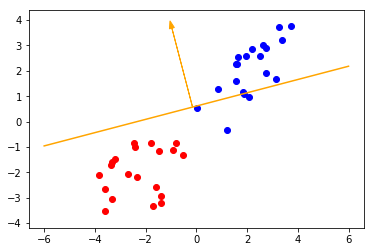

Iteration 6, w is [-1.9        -0.81402     3.10919902]
Iteration 1, w is [-1.9        -0.81402     3.10919902]
Iteration 2, w is [-1.9        -0.81402     3.10919902]
Iteration 3, w is [-1.9        -0.81402     3.10919902]
Iteration 4, w is [-1.9        -0.81402     3.10919902]
Iteration 5, w is [-1.9        -0.81402     3.10919902]
Iteration 6, w is [-1.9        -0.81402     3.10919902]
Iteration 7, w is [-1.9        -0.81402     3.10919902]


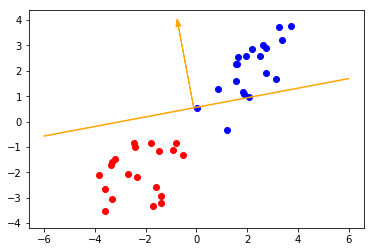

Iteration 7, w is [-1.8        -0.60490566  3.20777524]
Iteration 1, w is [-1.8        -0.60490566  3.20777524]
Iteration 2, w is [-1.8        -0.60490566  3.20777524]
Iteration 3, w is [-1.8        -0.60490566  3.20777524]
Iteration 4, w is [-1.8        -0.60490566  3.20777524]
Iteration 5, w is [-1.8        -0.60490566  3.20777524]
Iteration 6, w is [-1.8        -0.60490566  3.20777524]


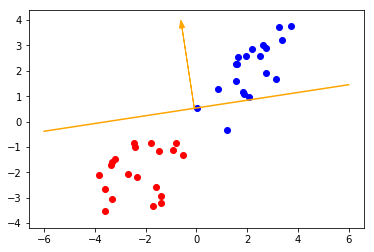

Iteration 6, w is [-1.7        -0.48503645  3.17431807]
Iteration 1, w is [-1.7        -0.48503645  3.17431807]
Iteration 2, w is [-1.7        -0.48503645  3.17431807]
Iteration 3, w is [-1.7        -0.48503645  3.17431807]
Iteration 4, w is [-1.7        -0.48503645  3.17431807]
Iteration 5, w is [-1.7        -0.48503645  3.17431807]
Iteration 6, w is [-1.7        -0.48503645  3.17431807]
Iteration 7, w is [-1.7        -0.48503645  3.17431807]
Iteration 8, w is [-1.7        -0.48503645  3.17431807]
Iteration 9, w is [-1.7        -0.48503645  3.17431807]
Iteration 10, w is [-1.7        -0.48503645  3.17431807]
Iteration 11, w is [-1.7        -0.48503645  3.17431807]
Iteration 12, w is [-1.7        -0.48503645  3.17431807]
Iteration 13, w is [-1.7        -0.48503645  3.17431807]
Iteration 14, w is [-1.7        -0.48503645  3.17431807]
Iteration 15, w is [-1.7        -0.48503645  3.17431807]
Iteration 16, w is [-1.7        -0.48503645  3.17431807]
Iteration 17, w is [-1.7        -0.485036

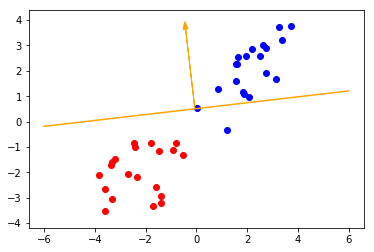

Iteration 19, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 1, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 2, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 3, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 4, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 5, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 6, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 7, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 8, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 9, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 10, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 11, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 12, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 13, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 14, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 15, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 16, w is [-1.6        -0.36516723  3.1408609 ]
Iteration 17, w is [-1.6        -0.36516

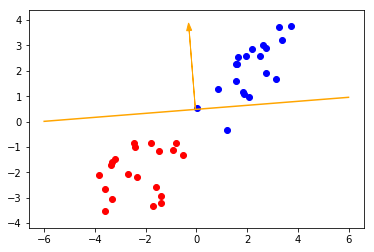

Iteration 19, w is [-1.5        -0.24529802  3.10740374]
Iteration 1, w is [-1.5        -0.24529802  3.10740374]
Iteration 2, w is [-1.5        -0.24529802  3.10740374]
Iteration 3, w is [-1.5        -0.24529802  3.10740374]
Iteration 4, w is [-1.5        -0.24529802  3.10740374]
Iteration 5, w is [-1.5        -0.24529802  3.10740374]
Iteration 6, w is [-1.5        -0.24529802  3.10740374]
Iteration 7, w is [-1.5        -0.24529802  3.10740374]
Iteration 8, w is [-1.5        -0.24529802  3.10740374]
Iteration 9, w is [-1.5        -0.24529802  3.10740374]
Iteration 10, w is [-1.5        -0.24529802  3.10740374]
Iteration 11, w is [-1.5        -0.24529802  3.10740374]
Iteration 12, w is [-1.5        -0.24529802  3.10740374]
Iteration 13, w is [-1.5        -0.24529802  3.10740374]
Iteration 14, w is [-1.5        -0.24529802  3.10740374]
Iteration 15, w is [-1.5        -0.24529802  3.10740374]
Iteration 16, w is [-1.5        -0.24529802  3.10740374]
Iteration 17, w is [-1.5        -0.24529

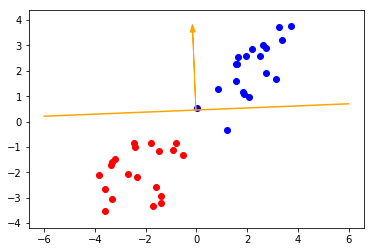

Iteration 19, w is [-1.4        -0.12542881  3.07394657]
Iteration 1, w is [-1.4        -0.12542881  3.07394657]
Iteration 2, w is [-1.4        -0.12542881  3.07394657]
Iteration 3, w is [-1.4        -0.12542881  3.07394657]
Iteration 4, w is [-1.4        -0.12542881  3.07394657]
Iteration 5, w is [-1.4        -0.12542881  3.07394657]
Iteration 6, w is [-1.4        -0.12542881  3.07394657]
Iteration 7, w is [-1.4        -0.12542881  3.07394657]
Iteration 8, w is [-1.4        -0.12542881  3.07394657]
Iteration 9, w is [-1.4        -0.12542881  3.07394657]
Iteration 10, w is [-1.4        -0.12542881  3.07394657]
Iteration 11, w is [-1.4        -0.12542881  3.07394657]
Iteration 12, w is [-1.4        -0.12542881  3.07394657]
Iteration 13, w is [-1.4        -0.12542881  3.07394657]
Iteration 14, w is [-1.4        -0.12542881  3.07394657]
Iteration 15, w is [-1.4        -0.12542881  3.07394657]
Iteration 16, w is [-1.4        -0.12542881  3.07394657]
Iteration 17, w is [-1.4        -0.12542

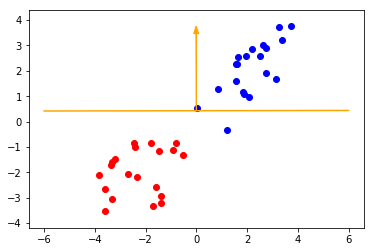

Iteration 19, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 1, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 2, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 3, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 4, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 5, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 6, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 7, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 8, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 9, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 10, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 11, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 12, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 13, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 14, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 15, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 16, w is [-1.3        -0.00555959  3.0404894 ]
Iteration 17, w is [-1.3        -0.00555

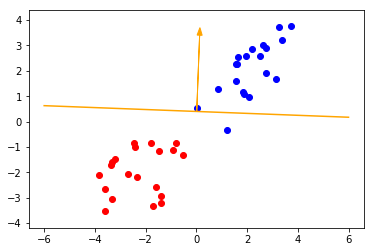

Iteration 19, w is [-1.2         0.11430962  3.00703223]
Iteration 1, w is [-1.2         0.11430962  3.00703223]
Iteration 2, w is [-1.2         0.11430962  3.00703223]
Iteration 3, w is [-1.2         0.11430962  3.00703223]
Iteration 4, w is [-1.2         0.11430962  3.00703223]
Iteration 5, w is [-1.2         0.11430962  3.00703223]
Iteration 6, w is [-1.2         0.11430962  3.00703223]
Iteration 7, w is [-1.2         0.11430962  3.00703223]
Iteration 8, w is [-1.2         0.11430962  3.00703223]
Iteration 9, w is [-1.2         0.11430962  3.00703223]
Iteration 10, w is [-1.2         0.11430962  3.00703223]
Iteration 11, w is [-1.2         0.11430962  3.00703223]
Iteration 12, w is [-1.2         0.11430962  3.00703223]
Iteration 13, w is [-1.2         0.11430962  3.00703223]
Iteration 14, w is [-1.2         0.11430962  3.00703223]
Iteration 15, w is [-1.2         0.11430962  3.00703223]
Iteration 16, w is [-1.2         0.11430962  3.00703223]
Iteration 17, w is [-1.2         0.11430

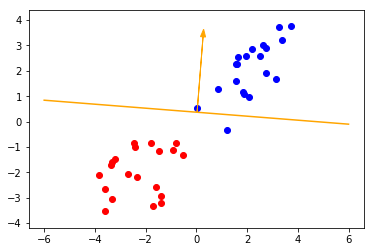

Iteration 19, w is [-1.1         0.23417883  2.97357506]
Iteration 1, w is [-1.1         0.23417883  2.97357506]
Iteration 2, w is [-1.1         0.23417883  2.97357506]
Iteration 3, w is [-1.1         0.23417883  2.97357506]
Iteration 4, w is [-1.1         0.23417883  2.97357506]
Iteration 5, w is [-1.1         0.23417883  2.97357506]
Iteration 6, w is [-1.1         0.23417883  2.97357506]
Iteration 7, w is [-1.1         0.23417883  2.97357506]
Iteration 8, w is [-1.1         0.23417883  2.97357506]
Iteration 9, w is [-1.1         0.23417883  2.97357506]
Iteration 10, w is [-1.1         0.23417883  2.97357506]
Iteration 11, w is [-1.1         0.23417883  2.97357506]
Iteration 12, w is [-1.1         0.23417883  2.97357506]
Iteration 13, w is [-1.1         0.23417883  2.97357506]
Iteration 14, w is [-1.1         0.23417883  2.97357506]
Iteration 15, w is [-1.1         0.23417883  2.97357506]
Iteration 16, w is [-1.1         0.23417883  2.97357506]
Iteration 17, w is [-1.1         0.23417

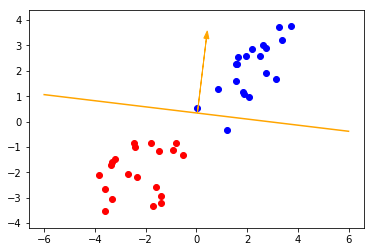

Iteration 19, w is [-1.          0.35404804  2.94011789]
Iteration 1, w is [-1.          0.35404804  2.94011789]
Iteration 2, w is [-1.          0.35404804  2.94011789]
Iteration 3, w is [-1.          0.35404804  2.94011789]
Iteration 4, w is [-1.          0.35404804  2.94011789]
Iteration 5, w is [-1.          0.35404804  2.94011789]
Iteration 6, w is [-1.          0.35404804  2.94011789]
Iteration 7, w is [-1.          0.35404804  2.94011789]
Iteration 8, w is [-1.          0.35404804  2.94011789]
Iteration 9, w is [-1.          0.35404804  2.94011789]
Iteration 10, w is [-1.          0.35404804  2.94011789]
Iteration 11, w is [-1.          0.35404804  2.94011789]
Iteration 12, w is [-1.          0.35404804  2.94011789]
Iteration 13, w is [-1.          0.35404804  2.94011789]
Iteration 14, w is [-1.          0.35404804  2.94011789]
Iteration 15, w is [-1.          0.35404804  2.94011789]
Iteration 16, w is [-1.          0.35404804  2.94011789]
Iteration 17, w is [-1.          0.35404

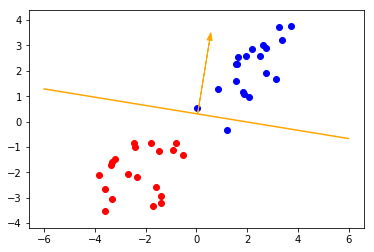

Iteration 19, w is [-0.9         0.47391726  2.90666072]
Iteration 1, w is [-0.9         0.47391726  2.90666072]
Iteration 2, w is [-0.9         0.47391726  2.90666072]
Iteration 3, w is [-0.9         0.47391726  2.90666072]
Iteration 4, w is [-0.9         0.47391726  2.90666072]
Iteration 5, w is [-0.9         0.47391726  2.90666072]
Iteration 6, w is [-0.9         0.47391726  2.90666072]
Iteration 7, w is [-0.9         0.47391726  2.90666072]
Iteration 8, w is [-0.9         0.47391726  2.90666072]
Iteration 9, w is [-0.9         0.47391726  2.90666072]
Iteration 10, w is [-0.9         0.47391726  2.90666072]
Iteration 11, w is [-0.9         0.47391726  2.90666072]
Iteration 12, w is [-0.9         0.47391726  2.90666072]
Iteration 13, w is [-0.9         0.47391726  2.90666072]
Iteration 14, w is [-0.9         0.47391726  2.90666072]
Iteration 15, w is [-0.9         0.47391726  2.90666072]
Iteration 16, w is [-0.9         0.47391726  2.90666072]
Iteration 17, w is [-0.9         0.47391

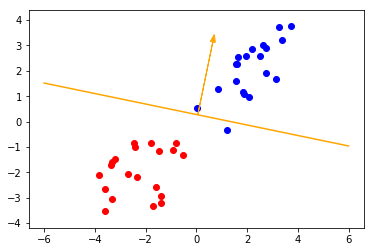

Iteration 19, w is [-0.8         0.59378647  2.87320355]
Iteration 1, w is [-0.8         0.59378647  2.87320355]
Iteration 2, w is [-0.8         0.59378647  2.87320355]
Iteration 3, w is [-0.8         0.59378647  2.87320355]
Iteration 4, w is [-0.8         0.59378647  2.87320355]
Iteration 5, w is [-0.8         0.59378647  2.87320355]
Iteration 6, w is [-0.8         0.59378647  2.87320355]
Iteration 7, w is [-0.8         0.59378647  2.87320355]
Iteration 8, w is [-0.8         0.59378647  2.87320355]
Iteration 9, w is [-0.8         0.59378647  2.87320355]
Iteration 10, w is [-0.8         0.59378647  2.87320355]
Iteration 11, w is [-0.8         0.59378647  2.87320355]
Iteration 12, w is [-0.8         0.59378647  2.87320355]
Iteration 13, w is [-0.8         0.59378647  2.87320355]
Iteration 14, w is [-0.8         0.59378647  2.87320355]
Iteration 15, w is [-0.8         0.59378647  2.87320355]
Iteration 16, w is [-0.8         0.59378647  2.87320355]
Iteration 17, w is [-0.8         0.59378

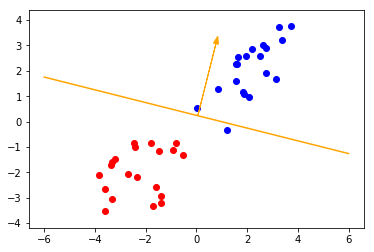

Iteration 19, w is [-0.7         0.71365568  2.83974639]
Iteration 1, w is [-0.7         0.71365568  2.83974639]
Iteration 2, w is [-0.7         0.71365568  2.83974639]
Iteration 3, w is [-0.7         0.71365568  2.83974639]
Iteration 4, w is [-0.7         0.71365568  2.83974639]
Iteration 5, w is [-0.7         0.71365568  2.83974639]
Iteration 6, w is [-0.7         0.71365568  2.83974639]
Iteration 7, w is [-0.7         0.71365568  2.83974639]
Iteration 8, w is [-0.7         0.71365568  2.83974639]
Iteration 9, w is [-0.7         0.71365568  2.83974639]
Iteration 10, w is [-0.7         0.71365568  2.83974639]
Iteration 11, w is [-0.7         0.71365568  2.83974639]
Iteration 12, w is [-0.7         0.71365568  2.83974639]
Iteration 13, w is [-0.7         0.71365568  2.83974639]
Iteration 14, w is [-0.7         0.71365568  2.83974639]
Iteration 15, w is [-0.7         0.71365568  2.83974639]
Iteration 16, w is [-0.7         0.71365568  2.83974639]
Iteration 17, w is [-0.7         0.71365

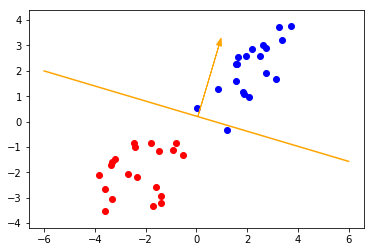

Iteration 19, w is [-0.6         0.8335249   2.80628922]
Iteration 1, w is [-0.6         0.8335249   2.80628922]
Iteration 2, w is [-0.6         0.8335249   2.80628922]
Iteration 3, w is [-0.6         0.8335249   2.80628922]
Iteration 4, w is [-0.6         0.8335249   2.80628922]
Iteration 5, w is [-0.6         0.8335249   2.80628922]
Iteration 6, w is [-0.6         0.8335249   2.80628922]
Iteration 7, w is [-0.6         0.8335249   2.80628922]
Iteration 8, w is [-0.6         0.8335249   2.80628922]
Iteration 9, w is [-0.6         0.8335249   2.80628922]
Iteration 10, w is [-0.6         0.8335249   2.80628922]
Iteration 11, w is [-0.6         0.8335249   2.80628922]
Iteration 12, w is [-0.6         0.8335249   2.80628922]
Iteration 13, w is [-0.6         0.8335249   2.80628922]
Iteration 14, w is [-0.6         0.8335249   2.80628922]
Iteration 15, w is [-0.6         0.8335249   2.80628922]
Iteration 16, w is [-0.6         0.8335249   2.80628922]
Iteration 17, w is [-0.6         0.83352

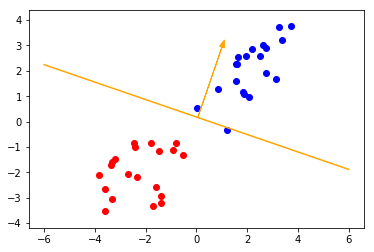

Iteration 19, w is [-0.5         0.95339411  2.77283205]
Iteration 1, w is [-0.5         0.95339411  2.77283205]
Iteration 2, w is [-0.5         0.95339411  2.77283205]
Iteration 3, w is [-0.5         0.95339411  2.77283205]
Iteration 4, w is [-0.5         0.95339411  2.77283205]
Iteration 5, w is [-0.5         0.95339411  2.77283205]
Iteration 6, w is [-0.5         0.95339411  2.77283205]
Iteration 7, w is [-0.5         0.95339411  2.77283205]
Iteration 8, w is [-0.5         0.95339411  2.77283205]
Iteration 9, w is [-0.5         0.95339411  2.77283205]
Iteration 10, w is [-0.5         0.95339411  2.77283205]
Iteration 11, w is [-0.5         0.95339411  2.77283205]
Iteration 12, w is [-0.5         0.95339411  2.77283205]
Iteration 13, w is [-0.5         0.95339411  2.77283205]
Iteration 14, w is [-0.5         0.95339411  2.77283205]
Iteration 15, w is [-0.5         0.95339411  2.77283205]
Iteration 16, w is [-0.5         0.95339411  2.77283205]
Iteration 17, w is [-0.5         0.95339

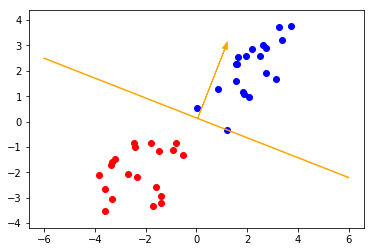

Iteration 19, w is [-0.4         1.07326332  2.73937488]
Iteration 1, w is [-0.4         1.07326332  2.73937488]
Iteration 2, w is [-0.4         1.07326332  2.73937488]
Iteration 3, w is [-0.4         1.07326332  2.73937488]
Iteration 4, w is [-0.4         1.07326332  2.73937488]
Iteration 5, w is [-0.4         1.07326332  2.73937488]
Iteration 6, w is [-0.4         1.07326332  2.73937488]
Iteration 7, w is [-0.4         1.07326332  2.73937488]
Iteration 8, w is [-0.4         1.07326332  2.73937488]
Iteration 9, w is [-0.4         1.07326332  2.73937488]
Iteration 10, w is [-0.4         1.07326332  2.73937488]
Iteration 11, w is [-0.4         1.07326332  2.73937488]
Iteration 12, w is [-0.4         1.07326332  2.73937488]
Iteration 13, w is [-0.4         1.07326332  2.73937488]
Iteration 14, w is [-0.4         1.07326332  2.73937488]
Iteration 15, w is [-0.4         1.07326332  2.73937488]
Iteration 16, w is [-0.4         1.07326332  2.73937488]
Iteration 17, w is [-0.4         1.07326

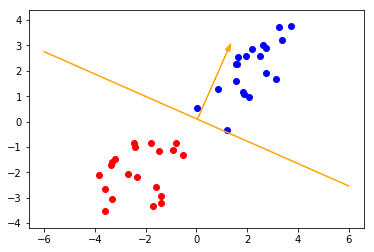

Iteration 19, w is [-0.3         1.19313254  2.70591771]
Iteration 1, w is [-0.3         1.19313254  2.70591771]
Iteration 2, w is [-0.3         1.19313254  2.70591771]
Iteration 3, w is [-0.3         1.19313254  2.70591771]
Iteration 4, w is [-0.3         1.19313254  2.70591771]
Iteration 5, w is [-0.3         1.19313254  2.70591771]
Iteration 6, w is [-0.3         1.19313254  2.70591771]
Iteration 7, w is [-0.3         1.19313254  2.70591771]
Iteration 8, w is [-0.3         1.19313254  2.70591771]
Iteration 9, w is [-0.3         1.19313254  2.70591771]
Iteration 10, w is [-0.3         1.19313254  2.70591771]
Iteration 11, w is [-0.3         1.19313254  2.70591771]
Iteration 12, w is [-0.3         1.19313254  2.70591771]
Iteration 13, w is [-0.3         1.19313254  2.70591771]
Iteration 14, w is [-0.3         1.19313254  2.70591771]
Iteration 15, w is [-0.3         1.19313254  2.70591771]
Iteration 16, w is [-0.3         1.19313254  2.70591771]
Iteration 17, w is [-0.3         1.19313

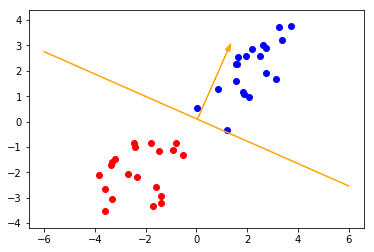

In [40]:
X, y = generate_data()
train_perceptron(X, y, eta=0.1)

## Gradient Descent

In [41]:
def sigmoid(x,a=1):
    # your code here
    return 1/(1+np.exp(-a*x))

def grad_sigmoid(x, a=1):
    # your code here
    return sigmoid(x,a)*(1-sigmoid(x,a))

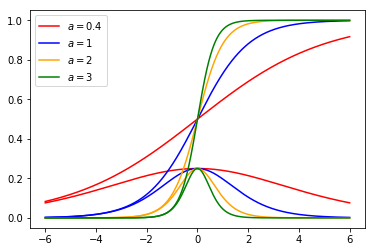

In [42]:
# plot sig functions 
xx = np.linspace(-6,6,1000)
a_vals = [0.4,1,2,3]
cols = ['red', 'blue', 'orange', 'green']
y_sig = [sigmoid(xx, a_val) for a_val in a_vals]
y_grad_sig = [grad_sigmoid(xx, a_val) for a_val in a_vals]

for i in range(len(a_vals)):
    label = str(a_vals[i])
    plt.plot(xx, y_sig[i], label=rf'$a={label}$', color=cols[i])
    plt.plot(xx, y_grad_sig[i], color=cols[i])
plt.legend()
plt.show()

In [53]:
def loss_i(w, x_i, y_i):
    '''squared loss for i-th data point'''
    # your code here
    return (y_i - sigmoid(x_i))**2
    
    
def grad_loss_i(w, x_i, y_i):
    '''grad loss for i-th data point'''
    # your code here
    return (y_i - sigmoid(x_i)) * (-x_i) * grad_sigmoid(w@x_i)

def gradient_descent(X, y, eta, T):
    #T iterations
    nmb_data = X.shape[0]
    w = np.array([-2,-1,-3])
    plot_scatter(X, y, w)
    # your code here
    for t in range(T):
        loss = 0
        grad_loss = 0
        for i in range(nmb_data):
            loss += loss_i(w,X[i],y[i])
            grad_loss += grad_loss_i(w,X[i],y[i])
        loss *= 0.5
        w = w-eta*grad_loss
        plot_scatter(X, y, w)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


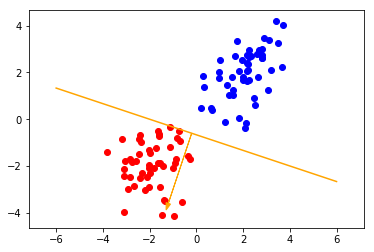

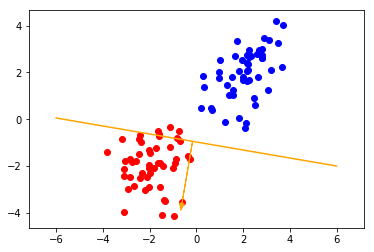

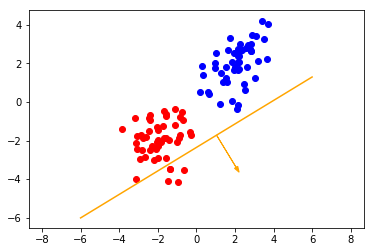

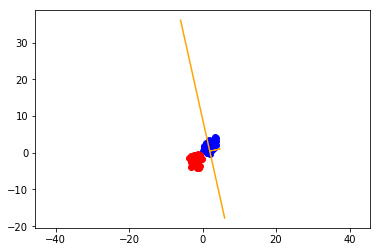

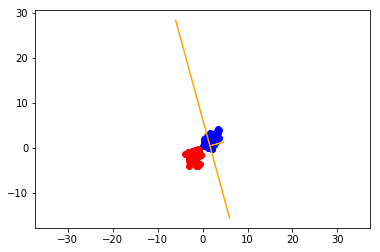

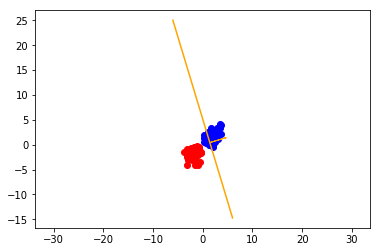

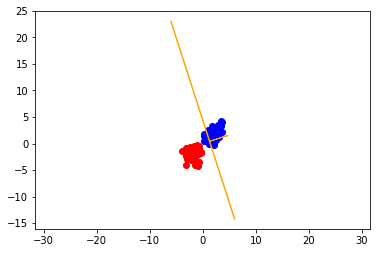

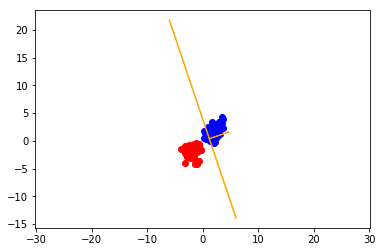

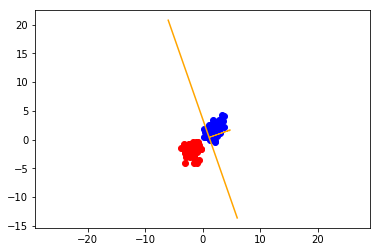

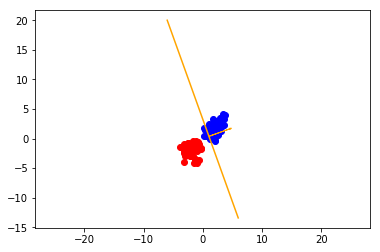

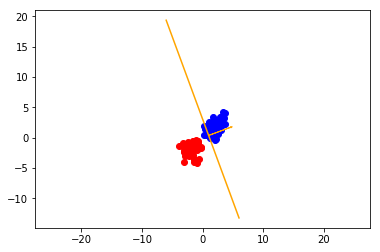

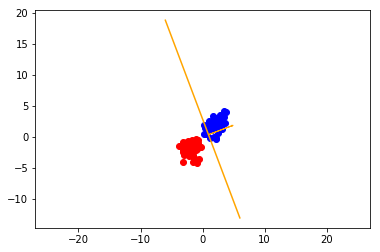

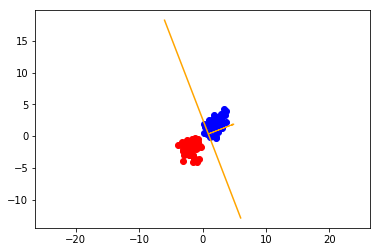

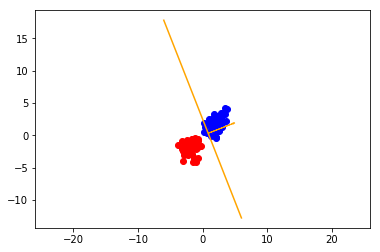

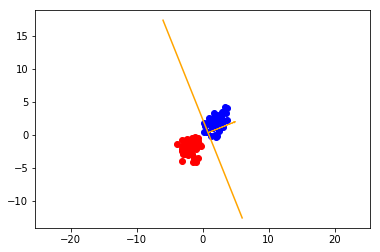

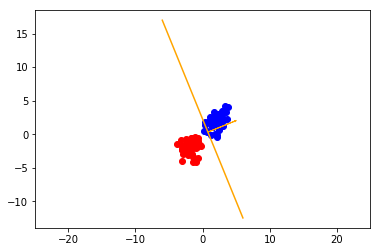

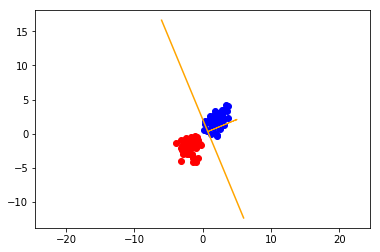

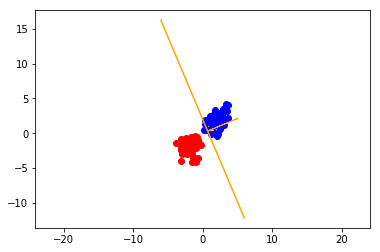

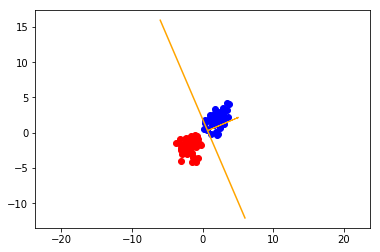

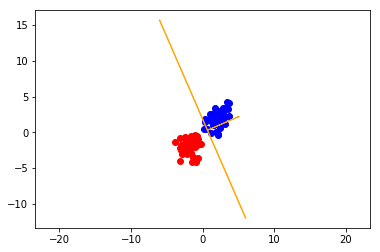

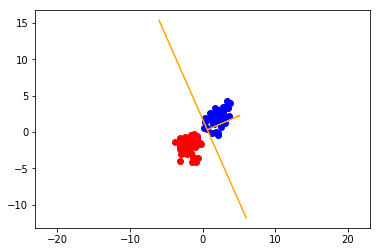

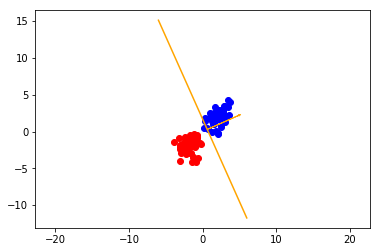

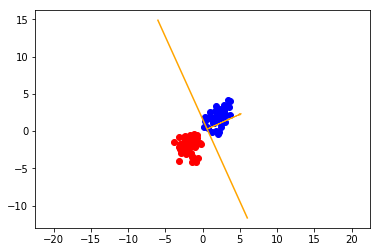

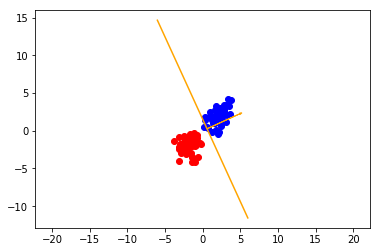

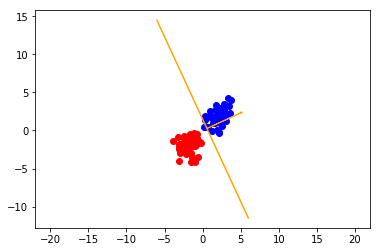

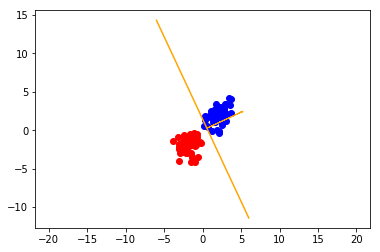

In [54]:
X, y = generate_data(50)
gradient_descent(X, y, 0.2, 25)

## Stochastic Gradient Descent

In [51]:
def stochastic_gradient_descent(X, y, eta, T):
    #T iterations
    nmb_data = X.shape[0]
    w = np.array([-2,-1,-3])
    plot_scatter(X, y, w)
    # your code here
    for i in range(T):
        loss = 0
        for t in range(nmb_data):
            loss += loss_i(w,X[i],y[i])
            w = w-eta*grad_loss_i(w,X[i],y[i])
        loss *= 0.5
        

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


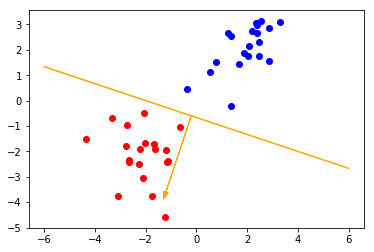

In [52]:
# generate data
X, y = generate_data()
stochastic_gradient_descent(X, y, 0.5, 15)